### Visualizing the Data

##### <br>
-Does Level of Unification have an impact on shutdowns? <br>
-Does shutdown have any impact on unemployment rates/debt ceiling? <br>
-Plot of approval ratings prior and after shutdowns <br>
-Visualization of government employees across the country

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
file_path = '../Input/output.xlsx'

In [3]:
party_df = pd.read_excel(file_path)

In [111]:
party_df.head()

,years,president,party_president,house_dem_seats,house_rep_seats,house_other_seats,senate_dem_seats,senate_rep_seats,senate_other_seats,gov_status,term_start,term_end,number_shutdown
0,1975-76,Ford,R,291,144,0,61,38,1,divided,1975,1976,1
1,1977-78,Carter,D,292,143,0,62,38,0,unified,1977,1978,4
2,1979-80,Carter,D,277,158,0,59,41,0,unified,1979,1980,1
3,1981-82,Reagan,R,243,192,0,47,53,0,divided,1981,1982,3
4,1983-84,Reagan,R,269,166,0,46,54,0,divided,1983,1984,3


In [107]:
party_df.number_shutdown.sum()

21

In [101]:
tes_df = party_df.groupby(['party_president','gov_status'])
tes_df.number_shutdown.count()

party_president  gov_status
D                divided        6
                 unified        4
R                divided       10
                 unified        3
Name: number_shutdown, dtype: int64

In [6]:
groupby_status = party_df['gov_status'].groupby(party_df['party_president'])
groupby_status.value_counts()

party_president  gov_status
D                divided        6
                 unified        4
R                divided       10
                 unified        3
Name: gov_status, dtype: int64

In [109]:
viz_df = pd.DataFrame({
    'Democrats':[3,5],
    'Republicans':[11,2]
})

Text(0, 0.5, 'Number of Shutdowns')

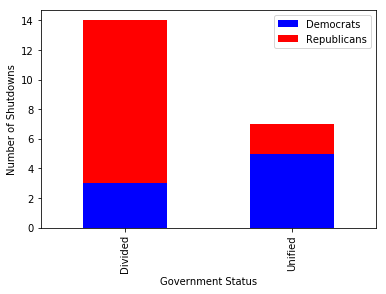

In [110]:
# Create a figure with one axes
fig, ax = plt.subplots()
x_axis = [0,1]
# Plot a stacked bar chart
viz_df.plot.bar(ax=ax, stacked=True,color=['blue','red'])
# Add axes labels using Matplotlib's API
ax.set_xlabel("Government Status")

plt.xticks(x_axis, ['Divided','Unified'])
ax.set_ylabel("Number of Shutdowns")

In [87]:
viz_df

,Democrats,Republicans
0,6,10
1,4,3


#### Loading data and saving it into dataframes

In [9]:
# Loading former presidents' approval ratings 
obama_path = '../Input/obama_approval.xlsx'
bush_path = '../Input/bush_approval.xlsx'
clinton_path = '../Input/clinton_approval.xlsx'
bush_senior_path = '../Input/bush_senior_approval.xlsx'
reagan_path = '../Input/reagan.xlsx'
carter_path = '../Input/carter_approval.xlsx'
ford_path = '../Input/ford_approval.xlsx'
congress_path = '../Input/congress_approval.xlsx'

In [10]:
# Creating dataframes
obama_df = pd.read_excel(obama_path)
bush_df = pd.read_excel(bush_path)
clinton_df = pd.read_excel(clinton_path)
bush_senior_df = pd.read_excel(bush_senior_path)
reagan_df = pd.read_excel(reagan_path)
carter_df = pd.read_excel(carter_path)
ford_df = pd.read_excel(ford_path)
congress_df = pd.read_excel(congress_path)

In [11]:
bush_df.head()

,start_date_bush,end_date_bush,approve_bush,dissaprove_bush,unsure_bush
0,2009-01-09,2009-01-11,34,61,5
1,2008-12-12,2008-12-14,29,67,4
2,2008-12-04,2008-12-07,32,61,7
3,2008-11-13,2008-11-16,29,66,4
4,2008-11-07,2008-11-09,28,68,5


In [12]:
all_path = '../Input/all_approval.xlsx'

In [13]:
all_df = pd.read_excel(all_path)

In [81]:
all_df[0:3789].head()

,start_date,end_date,approve,disapprove,no_opinion,president
0,2019-01-02,2019-01-10,37,59,4,Trump
1,2018-12-17,2018-12-22,39,55,5,Trump
2,2018-12-10,2018-12-16,38,57,4,Trump
3,2018-12-03,2018-12-09,40,56,4,Trump
4,2018-11-26,2018-12-02,40,56,4,Trump


In [40]:
all_df.tail()

,start_date,end_date,approve,disapprove,no_opinion,president
3813,1974-10-15,1974-10-15,53,28,17,Ford
3814,1974-10-08,1974-10-08,52,28,19,Ford
3815,1974-09-24,1974-09-24,49,28,21,Ford
3816,1974-09-03,1974-09-03,66,12,20,Ford
3817,1974-08-13,1974-08-13,70,3,26,Ford


#### Assumption is that where data doesn't exist 

#### Plotly

In [22]:
plotly.tools.set_credentials_file(username='ahmedamdg', api_key='')

In [85]:
trace1 = go.Scatter(
     x = all_df[0:3789].end_date, 
    y = all_df[0:3789].no_opinion, 
    name = "No Opinion/Data", 
    text = all_df[0:3789].no_opinion, 
    yaxis = "y", 
)

trace2 = go.Scatter(
    x = all_df[0:3789].end_date, 
    y = all_df[0:3789].disapprove, 
    name = "Disapprove", 
    text = all_df[0:3789].disapprove, 
    yaxis = "y2", 
)

trace3 = go.Scatter(
    x =all_df[0:3789].end_date, 
    y = all_df[0:3789].approve, 
    name =  "Approve", 
    text =  all_df[0:3789].approve, 
    yaxis = "y3",
)



data = [trace1, trace2, trace3]

# style all the traces
for k in range(len(data)):
    data[k].update(
        {
            "hoverinfo": "name+x+text",
            "line": {"width": 0.5}, 
            "marker": {"size": .5},
            "mode": "lines+markers",
            "showlegend": False
        }
    )

layout = {
  "annotations": [
    {
      "x": "1974-08-27", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.3, 
      "ax": 20, 
      "ay": 30, 
      "text": "Ford", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
    {
      "x": "1977-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(76, 175, 80, 0.1)", 
      "arrowsize": 0.3, 
      "ax": 30,
      "ay": 30,
      "text": "Carter",
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    },
      {
      "x": "1981-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.3, 
      "ax": 60, 
      "ay": 30, 
      "text": "Reagan", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1989-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "H.W Bush", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1993-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.5, 
      "ax": 60, 
      "ay": 30, 
      "text": "Clinton", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "2001-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.3, 
      "ax": 60, 
      "ay": 30, 
      "text": "Bush", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
       {
      "x": "2009-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.3, 
      "ax": 60, 
      "ay": 30, 
      "text": "Obama", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
       {
      "x": "2017-01-20", 
      "y": 0, 
      "arrowcolor": "rgba(63, 81, 181, 0.2)", 
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "Trump", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
      {
      "x": "1995-12-05", 
      "y": 0, 
      "arrowcolor": "rgba(0, 0, 0, 0.4)",   # Shutdown annotation
      "arrowsize": 0.3, 
      "ax": 30, 
      "ay": 30, 
      "text": "SD", 
      "xref": "x", 
      "yanchor": "bottom", 
      "yref": "y"
    }, 
  ], 
  "dragmode": "zoom", 
  "hovermode": "x", 
  "legend": {"traceorder": "reversed"}, 
  "margin": {
    "t": 100, 
    "b": 100
  }, 
  "shapes": [
    {
      "fillcolor": "rgba(255, 0, 0, 0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1974-08-13", 
      "x1": "1977-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
       {
      "fillcolor": "rgba(0, 0, 0, 0.2)",     # shutdown shape dict
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1995-12-05", 
      "x1": "1996-01-06", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
    {
      "fillcolor": "rgba(0,0,255,0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1977-01-20", 
      "x1": "1981-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    },
      {
      "fillcolor": "rgba(255, 0, 0, 0.3)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1981-01-20", 
      "x1": "1989-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
  {
      "fillcolor": "rgba(255, 0, 0, 0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1989-01-20", 
      "x1": "1993-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      {
      "fillcolor": "rgba(0,0,255,0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "1993-01-20", 
      "x1": "2001-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 

    {
      "fillcolor": "rgba(255, 0, 0, 0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2001-01-20", 
      "x1": "2009-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
       {
      "fillcolor": "rgba(0, 0, 255, 0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2009-01-20", 
      "x1": "2017-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      {
      "fillcolor": "rgba(255, 0, 0, 0.2)", 
      "line": {"width": 0}, 
      "type": "rect", 
      "x0": "2017-01-20", 
      "x1": "2020-01-20", 
      "xref": "x", 
      "y0": 0, 
      "y1": 0.65, 
      "yref": "paper"
    }, 
      
  ], 
  "xaxis": {
    "autorange": True, 
    "range": ["1975", "2019"], 
    "rangeslider": {
      "autorange": True, 
      "range": ["1975", "2019"]
    }, 
    "type": "date"
  }, 
  "yaxis": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0, 0.2], 
    "linecolor": "#673ab7", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#673ab7"}, 
    "tickmode": "auto", 
    "ticks": "", 
    "titlefont": {"color": "#673ab7"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis2": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.2, 0.4], 
    "linecolor": "#E91E63", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#E91E63"}, 
    "tickmode": "auto", 
    "ticks": "", 
    "titlefont": {"color": "#E91E63"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis3": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.4, 0.6], 
    "linecolor": "#795548", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#795548"}, 
    "tickmode": "auto", 
    "ticks": "", 
    "title": "% Approval", 
    "titlefont": {"color": "#795548"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis4": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.6, 0.8], 
    "linecolor": "#607d8b", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#607d8b"}, 
    "tickmode": "auto", 
    "ticks": "", 
#     "title": "%", 
    "titlefont": {"color": "#607d8b"}, 
    "type": "linear", 
    "zeroline": False
  }, 
  "yaxis5": {
    "anchor": "x", 
    "autorange": True, 
    "domain": [0.8, 1], 
    "linecolor": "#2196F3", 
    "mirror": True, 
    "range": [0, 100], 
    "showline": True, 
    "side": "right", 
    "tickfont": {"color": "#2196F3"}, 
    "tickmode": "auto",
    "ticks": "", 
    "title":  "%", 
    "titlefont": {"color": "#2196F3"}, 
    "type": "linear", 
    "zeroline": False
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### Deleting all plotly plots

In [64]:
# import json
# import requests
# from requests.auth import HTTPBasicAuth

# username = 'ahmedamdg' # Replace with YOUR USERNAME
# api_key = '' # Replace with YOUR API KEY

# auth = HTTPBasicAuth(username, api_key)
# headers = {'Plotly-Client-Platform': 'python'}

# plotly.tools.set_credentials_file(username=username, api_key=api_key)

In [65]:
# def get_pages(username, page_size):
#     url = 'https://api.plot.ly/v2/folders/all?user='+username+'&page_size='+str(page_size)
#     response = requests.get(url, auth=auth, headers=headers)
#     if response.status_code != 200:
#         return
#     page = json.loads(response.content)
#     yield page
#     while True:
#         resource = page['children']['next'] 
#         if not resource:
#             break
#         response = requests.get(resource, auth=auth, headers=headers)
#         if response.status_code != 200:
#             break
#         page = json.loads(response.content)
#         yield page
        
# def permanently_delete_files(username, page_size=500, filetype_to_delete='plot'):
#     for page in get_pages(username, page_size):
#         for x in range(0, len(page['children']['results'])):
#             fid = page['children']['results'][x]['fid']
#             res = requests.get('https://api.plot.ly/v2/files/' + fid, auth=auth, headers=headers)
#             res.raise_for_status()
#             if res.status_code == 200:
#                 json_res = json.loads(res.content)
#                 if json_res['filetype'] == filetype_to_delete:
#                     # move to trash
#                     requests.post('https://api.plot.ly/v2/files/'+fid+'/trash', auth=auth, headers=headers)
#                     # permanently delete
#                     requests.delete('https://api.plot.ly/v2/files/'+fid+'/permanent_delete', auth=auth, headers=headers)

# permanently_delete_files(username, filetype_to_delete='plot')
# permanently_delete_files(username, filetype_to_delete='grid')